# Degree Distribution

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import folium

import networkx as nx

In [2]:
%load_ext rpy2.ipython

In [3]:
G = nx.read_gml('../data/final/trips.gml')

In [4]:
degrees = [i[1] for i in G.degree]

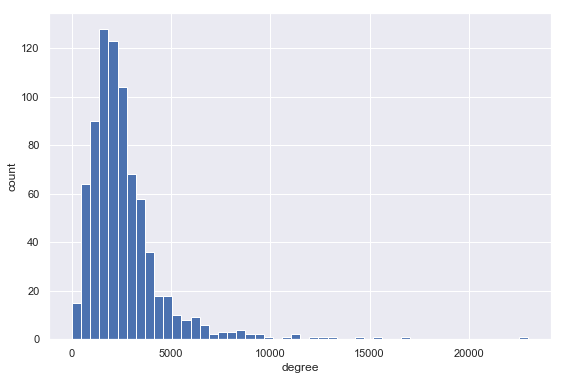

In [5]:
plt.figure(figsize=(9, 6))
plt.hist(degrees, bins=50)
plt.xlabel('degree')
plt.ylabel('count')
plt.savefig('img/degree_distribution.pdf')

In [6]:
print('mean: {}'.format(np.mean(degrees)))
print('var: {}'.format(np.var(degrees)))

mean: 2633.544757033248
var: 4227758.874595274


In [7]:
degrees_array = np.array(degrees)

In [8]:
%%R -i degrees_array -o fitted_degrees
library('MASS')
params = fitdistr(degrees_array, 'negative binomial')
estimate = params$estimate
print(sprintf('theta: %f, mu: %f', estimate[1], estimate[2]))
fitted_degrees = rnegbin(length(degrees_array), estimate[2], estimate[1])

[1] "theta: 2.347911, mu: 2633.544757"


In [9]:
fitted_degrees = list(fitted_degrees)

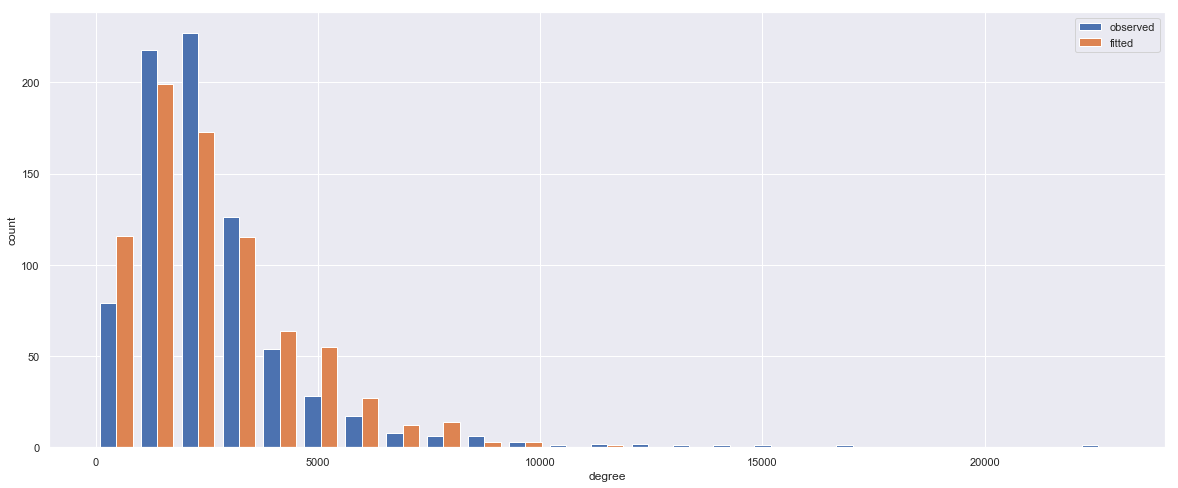

In [10]:
plt.figure(figsize=(20, 8))
plt.hist([degrees, fitted_degrees], bins=25, rwidth=0.8)
plt.xlabel('degree')
plt.ylabel('count')
plt.legend(['observed', 'fitted'])
plt.savefig('img/degree_distribution2.pdf')

In [11]:
observed_fitted = pd.DataFrame({'observed' : degrees, 'fitted': fitted_degrees})
observed_fitted = observed_fitted.apply(pd.Series.value_counts).fillna(0)
observed_fitted = observed_fitted.values

In [12]:
%%R -i observed_fitted
fisher.test(observed_fitted, simulate.p.value=TRUE)


	Fisher's Exact Test for Count Data with simulated p-value (based on
	2000 replicates)

data:  observed_fitted
p-value = 0.6267
alternative hypothesis: two.sided



In [13]:
bikepoints = pd.read_pickle('../data/intermediate/bikepoints.pickle')

temp = pd.DataFrame.from_dict(dict(G.degree), orient='index', columns=['degree'])
temp.index = temp.index.astype('int')

bikepoints = pd.merge(bikepoints, temp, left_on='id', right_index=True)

In [14]:
m = folium.Map(location=[51.510, -0.118], tiles='Stamen toner', zoom_start=12, detect_retina=True)
for i, bikepoint in bikepoints.sort_values('degree', ascending=False).head(10).iterrows():
    folium.Circle([bikepoint['lat'], bikepoint['lon']], 75, color='red').add_to(m)
m.save('img/10_degrees.html')
m

In [15]:
m = folium.Map(location=[51.510, -0.118], tiles='Stamen toner', zoom_start=12, detect_retina=True)
for i, bikepoint in bikepoints.sort_values('degree', ascending=False).head(50).iterrows():
    folium.Circle([bikepoint['lat'], bikepoint['lon']], 75, color='red').add_to(m)
m.save('img/50_degrees.html')
m

In [16]:
m = folium.Map(location=[51.510, -0.118], tiles='Stamen toner', zoom_start=12, detect_retina=True)
for i, bikepoint in bikepoints.sort_values('degree', ascending=False).head(250).iterrows():
    folium.Circle([bikepoint['lat'], bikepoint['lon']], 75, color='red').add_to(m)
m.save('img/250_degrees.html')
m

In [17]:
m = folium.Map(location=[51.510, -0.118], tiles='Stamen toner', zoom_start=12, detect_retina=True)
for i, bikepoint in bikepoints.sort_values('degree', ascending=False).iterrows():
    folium.Circle([bikepoint['lat'], bikepoint['lon']], 75, color='red').add_to(m)
m.save('img/782_degrees.html')
m